# Task 3 - CNNs, ResNets, Transfer Learning and Grad-CAM

### Deadline Tuesday, June 13, 2023 at 11:59 p.m

### Time required to solve this exercise sheet
**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

# IMPORTANT SUBMISSION INSTRUCTIONS

- When you're done, download the notebook and rename it to task3_[name].ipynb
- Only submit the `ipynb` file, no other file is required.
- The deadline is strict.
- Minimal requirement for passing: solving all code cells.

Implementation
- Do not change the cells which are marked as "Do not change", similarly write your solution to the marked cells.

# Topics

In this exercise sheet, you will:
- Work with a dataset consisting of images of electronic waste.
- Implement a CNN for classification
- Compare MLP and CNN
- Vary architecture to improve model performance
- Implement a ResNet
- Apply transfer learning using ResNet50
- Apply Grad-CAM class activation visualization

*We are looking forward to seeing your solutions! Have fun!*

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:
*   [Scikit-learn Tutorials](https://www.tensorflow.org/tutorials)
*   [TensorFlow Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Imports

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import models, layers, optimizers, losses, callbacks
import seaborn as sns
import matplotlib.pyplot as plt

gpus = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 2.1

## Loading e-waste dataset



The data is available here: [https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0](https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0)

Password is: EK_data


In this task, we are looking for an automated classification of electronic waste to seven classes, e.g. those containing wood, glass etc. To this end, a dataset containing images of different types of electronic waste is prepared. The data is provided as a `zip` file. Please, extract it in a directory.

Use `tf.keras.utils.image_dataset_from_directory` to load the dataset from the directory. We have in total 9,906 samples and 7 classes.

#### TODO

- Consider 80% of the samples for training and 20% for validation.
- Use a batch size of 32
- Resize the image to image height and width of 224 $\times$ 224.

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
!mkdir -p grive/dataset
!unzip -q /content/Dataset.zip -d grive/dataset



In [65]:
# TODO load dataset from directory

data_dir = '/content/grive/dataset'
batch_size = 32
img_height = 224
img_width = 224
num_classes = 7

train_ds, val_ds = image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="both",
            seed=123,
            image_size= (img_height, img_width),
            batch_size=batch_size
            )


Found 9906 files belonging to 7 classes.
Using 7925 files for training.
Using 1981 files for validation.


#### TODO
- Print the name of classes.

In [66]:
####################
## YOUR CODE HERE ##
####################
class_names = train_ds.class_names
print("Class Names:", class_names)


Class Names: ['EK glashaltig', 'EK hochwertig', 'EK holzhaltig', 'Gewerbeabfall', 'Kunststoff', 'Mischkunststoff', 'metallreich']


Let us visualize some samples of the training dataset and their corresponding labels.

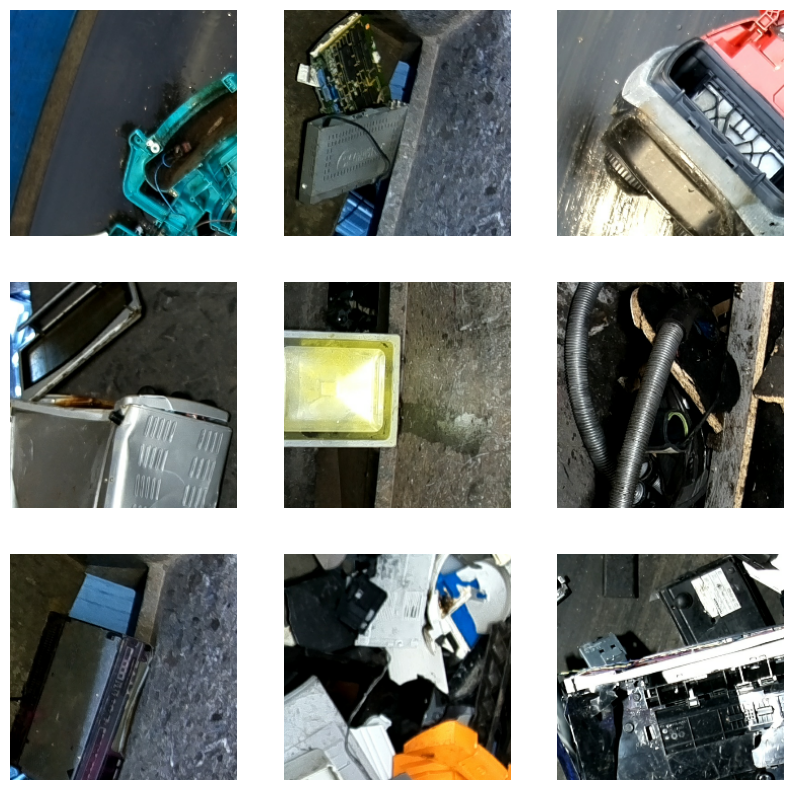

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")


# Subtask 2.2

## Convolution and Pooling operations

![model]( 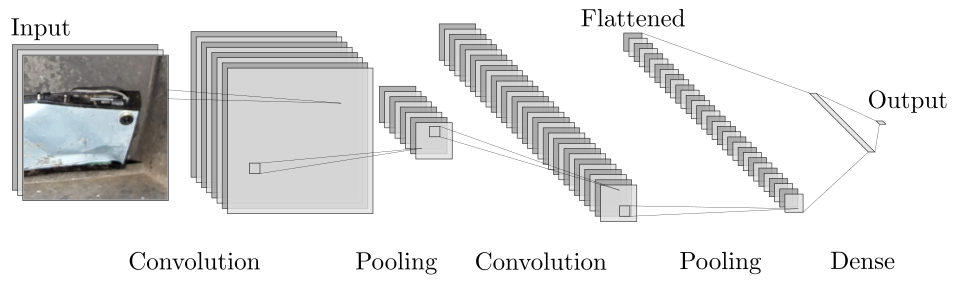)



Let us start by applying convolution and pooling operations on a batch of samples.
#### TODO
 - Take one batch of samples from the training data set.
 - Create a convolution layer containing 8 filters with the size of 3 $\times$ 3 and stride of 1.
 - Apply convolution on the images.
 - Print the input shape.
 - Print the output shape.

In [68]:
image, label =  zip(*train_ds.take(1))
x = image[0]

####################
## YOUR CODE HERE ##
####################

conv_layer = layers.Conv2D(8, (3, 3), strides=(1, 1), padding='same')
conv_output = conv_layer(x)

print("Input shape:", x.shape)
print("Output shape:", conv_output.shape)

Input shape: (32, 224, 224, 3)
Output shape: (32, 224, 224, 8)


#### TODO
- Print shape of the trainable parameters of the layer. You can use `get_weights()` method.

In [69]:
####################
## YOUR CODE HERE ##
####################


conv_layer = layers.Conv2D(8, (3, 3), strides=(1, 1), padding='same')
conv_output = conv_layer(x)

weights = conv_layer.get_weights()
trainable_params_shape = [w.shape for w in weights]

print("The Trainable Parameters Shape:", trainable_params_shape)


The Trainable Parameters Shape: [(3, 3, 3, 8), (8,)]


#### TODO
 - Perform zero padding to get the same shape after convolution.

In [70]:
####################
## YOUR CODE HERE ##
####################

conv_layer = layers.Conv2D(8, (3, 3), strides=(1, 1), padding='same')
conv_output = conv_layer(x)

# Perform zero padding
padding_layer = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))
padded_output = padding_layer(conv_output)

print("The input shape are :", x.shape)
print("Our output shape after convolution is:", conv_output.shape)
print("Our output shape after zero padding is:", padded_output.shape)

The input shape are : (32, 224, 224, 3)
Our output shape after convolution is: (32, 224, 224, 8)
Our output shape after zero padding is: (32, 226, 226, 8)


#### TODO
 - Perform convolution as before but with the stride of 2.
 - Print the input and output shapes.

In [71]:
####################
## YOUR CODE HERE ##
####################

conv_layer = layers.Conv2D(8, (3, 3), strides=(2, 2), padding='same')
conv_output = conv_layer(x)

print("The input shape is:", x.shape)
print("Our output shape after convolution with stride 2 is:", conv_output.shape)


The input shape is: (32, 224, 224, 3)
Our output shape after convolution with stride 2 is: (32, 112, 112, 8)


#### TODO
- Create a max pooling layer with the pool size of `(2, 2)`.
- Apply the max pooling operation on a batch of samples.
- Print the input and output shapes.
- Print shape of the trainable parameters.

In [72]:
####################
## YOUR CODE HERE ##
####################

pool_layer = layers.MaxPooling2D(pool_size=(2, 2))
pool_output = pool_layer(x)

print("Input shape:", x.shape)
print("Output shape after max pooling:", pool_output.shape)

trainable_params_shape = [w.shape for w in pool_layer.get_weights()]
print("Trainable Parameters Shape:", trainable_params_shape)

Input shape: (32, 224, 224, 3)
Output shape after max pooling: (32, 112, 112, 3)
Trainable Parameters Shape: []


#### TODO
- Create a global average pooling layer.
- Apply the global average pooling operation on a batch of samples.
- Print the input and output shapes.


In [73]:
####################
## YOUR CODE HERE ##
####################

avg_pool_layer = tf.keras.layers.GlobalAveragePooling2D()
avg_pool_output = avg_pool_layer(x)

print("Input shape:", x.shape)
print("Output shape after global average pooling:", avg_pool_output.shape)

Input shape: (32, 224, 224, 3)
Output shape after global average pooling: (32, 3)


# Subtask 2.3

## Convolutional neural networks (CNNs)

#### TODO
- Implement a simple CNN model for classification. You need the following layers:
    - Input
    - Rescaling by a factor of 1/225.
    - Convolution with 8 filters of the size of 3 $\times$ 3 and stride 1.
    - Max pooling with a pool size of `(2, 2)`.
    - Flatten
    - Dense with number of neurons equal to number of classes and `softmax` activation function.
- Print `model.summary()`.
- Train the network using `Adam` optimizer with the learning rate of 0.001 for 20 epochs.
- Use `SparseCategoricalCrossentropy` as the loss function.
- Compute and report the accuracy during training. In `model.compile()` you can set `metrics = ['accuracy']`.
- Use model checkpoints to save the best model.
- Plot the learning curves using the `plot_learning_curves` function provided below.



In [74]:
def plot_learning_curves(hist):
    epochs = np.arange(0, len(hist.history['loss'])) + 1
    sns.set(style='ticks')
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex=True)
    ax[0].plot(epochs, hist.history['loss'], label = 'Training loss', marker = 'o', ls = '--')
    ax[0].plot(epochs, hist.history['val_loss'], label = 'Validation loss', marker = 'o', ls = '--')

    ax[1].plot(epochs, hist.history['accuracy'], label = 'Training accuracy', marker = 'o', ls = '--')
    ax[1].plot(epochs, hist.history['val_accuracy'], label = 'Validation accuracy', marker = 'o', ls = '--')

    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss vs. Epoch')
    ax[0].legend()

    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy vs. Epoch')
    ax[1].legend()
    sns.despine(trim=True, offset=5)

In [76]:
from tensorflow import keras
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./225)(inputs)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 7)                 702471    
                                                             

In [77]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             monitor='val_accuracy',
                                             mode='max',
                                             verbose=1)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[checkpoint])





Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 2.8023 - accuracy: 0.5110
Epoch 1: val_accuracy improved from -inf to 0.61383, saving model to best_model.h5
248/248 [==============================] - 223s 895ms/step - loss: 2.8023 - accuracy: 0.5110 - val_loss: 1.1060 - val_accuracy: 0.6138
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.7923 - accuracy: 0.7529
Epoch 2: val_accuracy improved from 0.61383 to 0.69965, saving model to best_model.h5
248/248 [==============================] - 233s 936ms/step - loss: 0.7923 - accuracy: 0.7529 - val_loss: 0.9388 - val_accuracy: 0.6996
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.8602
Epoch 3: val_accuracy did not improve from 0.69965
248/248 [==============================] - 236s 949ms/step - loss: 0.5076 - accuracy: 0.8602 - val_loss: 0.9710 - val_accuracy: 0.6588
Epoch 4/20
248/248 [==============================] - ETA: 0s - loss: 0.3306 - accuracy

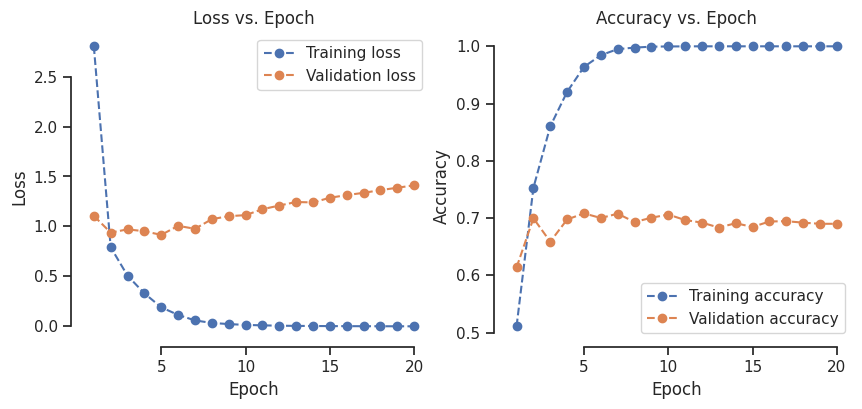

In [78]:
# TODO plot learning curves
plot_learning_curves(history)

####################
## YOUR CODE HERE ##
####################

# Subtask 2.4

## Compare CNN with MLP

#### TODO
- Train an MLP model and compare the results with the CNN model you trained regarding the performance of the model, time of training, and the number of parameters.

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 4.3993 - accuracy: 0.1812
Epoch 1: val_accuracy did not improve from 0.70823
248/248 [==============================] - 86s 337ms/step - loss: 4.3993 - accuracy: 0.1812 - val_loss: 1.9330 - val_accuracy: 0.2090
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 1.9305 - accuracy: 0.2000
Epoch 2: val_accuracy did not improve from 0.70823
248/248 [==============================] - 83s 332ms/step - loss: 1.9305 - accuracy: 0.2000 - val_loss: 1.9254 - val_accuracy: 0.2090
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 1.9268 - accuracy: 0.2000
Epoch 3: val_accuracy did not improve from 0.70823
248/248 [==============================] - 87s 348ms/step - loss: 1.9268 - accuracy: 0.2000 - val_loss: 1.9241 - val_accuracy: 0.2090
Epoch 4/20
248/248 [==============================] - ETA: 0s - loss: 1.9263 - accuracy: 0.2000
Epoch 4: val_accuracy did not improve from 0.70823
248/248 [=

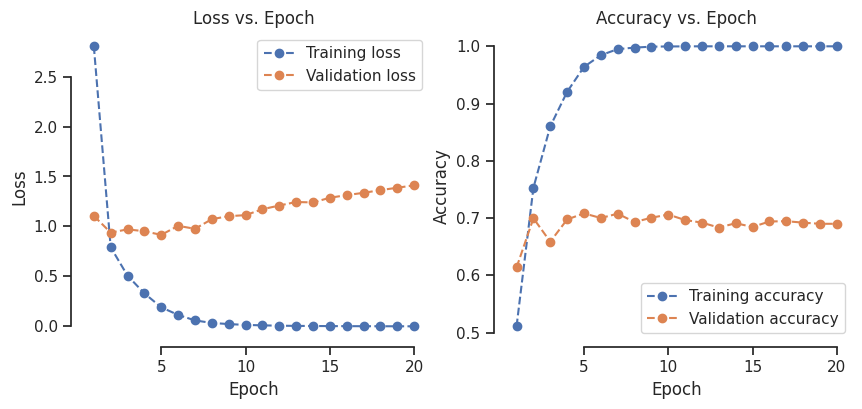

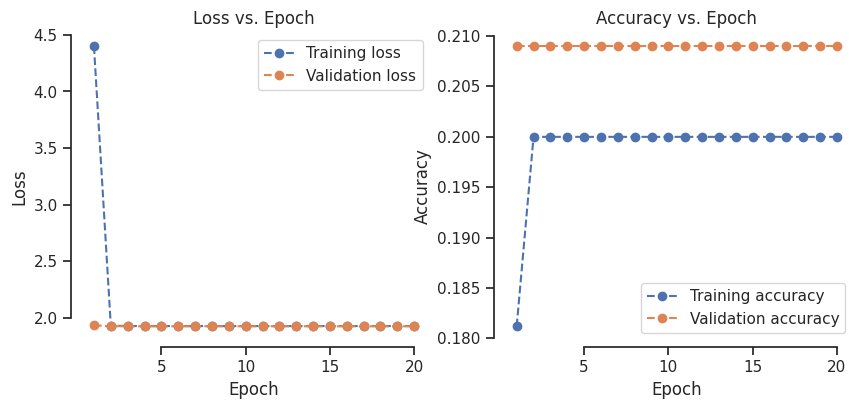

In [79]:
####################
## YOUR CODE HERE ##
####################

# Define MLP model
mlp_model = keras.Sequential([
    layers.Rescaling(1./225, input_shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train MLP model
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(train_ds,
                            validation_data=val_ds,
                            epochs=20,
                            callbacks=[checkpoint])

# Compare results
cnn_results = model.evaluate(val_ds)
mlp_results = mlp_model.evaluate(val_ds)

print("CNN Model Accuracy:", cnn_results[1])
print("MLP Model Accuracy:", mlp_results[1])

print("CNN Model Training Time:", history.epoch[-1])
print("MLP Model Training Time:", mlp_history.epoch[-1])

print("CNN Model Total Parameters:", model.count_params())
print("MLP Model Total Parameters:", mlp_model.count_params())

plot_learning_curves(history)
plot_learning_curves(mlp_history)



# Subtask 2.5

## Model architecture

We did only one step of down-sampling using the max-pooling layer. From `model.summary()` we can see that a Dense layer that maps a vector with the size of 111 $\times$ 111 $\times$ 8 to the output size of 7 is needed. Having a layer with such large number of parameters is prone to over-fitting. Let us perform more steps of down-sampling to avoid this.

#### TODO
 - Keep everything the same as the previous TODO, but perform four steps of convolution and max-pooling rather than just one.
 - In each step of down-sampling double the number of filters.


In [80]:
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./225)(inputs)

filters = 8

# Four steps of down-sampling
for _ in range(4):
    x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    filters *= 2

x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                      

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


248/248 [==============================] - ETA: 0s - loss: 1.3790 - accuracy: 0.4999
Epoch 1: val_loss improved from inf to 0.97891, saving model to best_model.h5
248/248 [==============================] - 366s 1s/step - loss: 1.3790 - accuracy: 0.4999 - val_loss: 0.9789 - val_accuracy: 0.6658
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.7535 - accuracy: 0.7488
Epoch 2: val_loss improved from 0.97891 to 0.59215, saving model to best_model.h5
248/248 [==============================] - 363s 1s/step - loss: 0.7535 - accuracy: 0.7488 - val_loss: 0.5922 - val_accuracy: 0.8011
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.8496
Epoch 3: val_loss improved from 0.59215 to 0.58145, saving model to best_model.h5
248/248 [==============================] - 364s 1s/step - loss: 0.4619 - accuracy: 0.8496 - val_loss: 0.5814 - val_accuracy: 0.8016
Epoch 4/20
248/248 [==============================] - ETA: 0s - loss: 0.3229 - accura

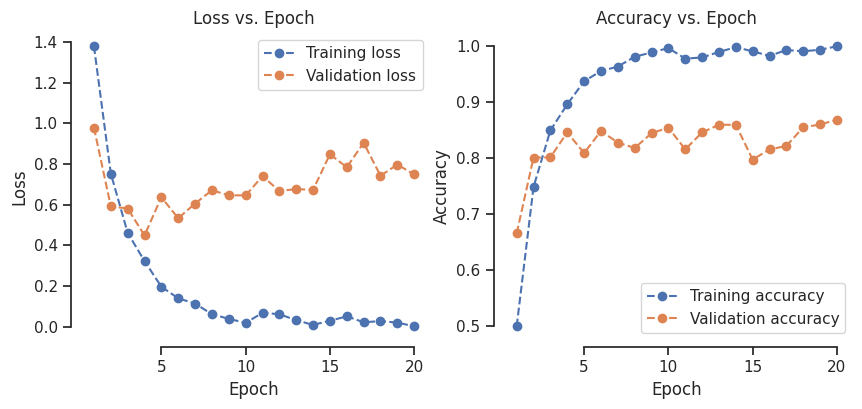

In [81]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[checkpoint])

# Plot learning curves
plot_learning_curves(history)



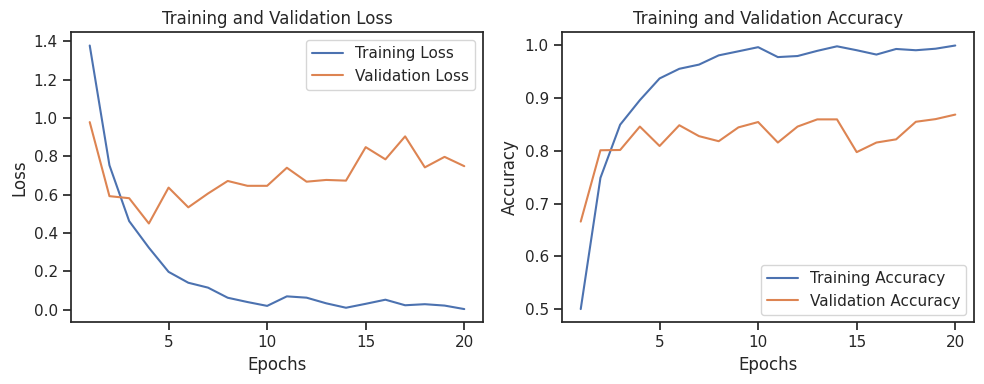

In [82]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
def plot_learning_curves(history):
    epochs = np.arange(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_learning_curves(history)


You can also perform global average pooling and down-sample the input image to a vector. Let us implement a `GlobalAveragePooling2D` layer rather than the `Flatten` layer.

#### TODO
- Keep every setting as the previous TODO, and replace the `Flatten` layer with `GlobalAveragePooling2D`.
- Train the model for 20 epochs.

In [83]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(8, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(16, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                      

Epoch 1/2
248/248 [==============================] - 373s 1s/step - loss: 1.6735 - accuracy: 0.3406 - val_loss: 1.4444 - val_accuracy: 0.4654
Epoch 2/2
248/248 [==============================] - 367s 1s/step - loss: 1.2980 - accuracy: 0.5441 - val_loss: 1.2072 - val_accuracy: 0.5416


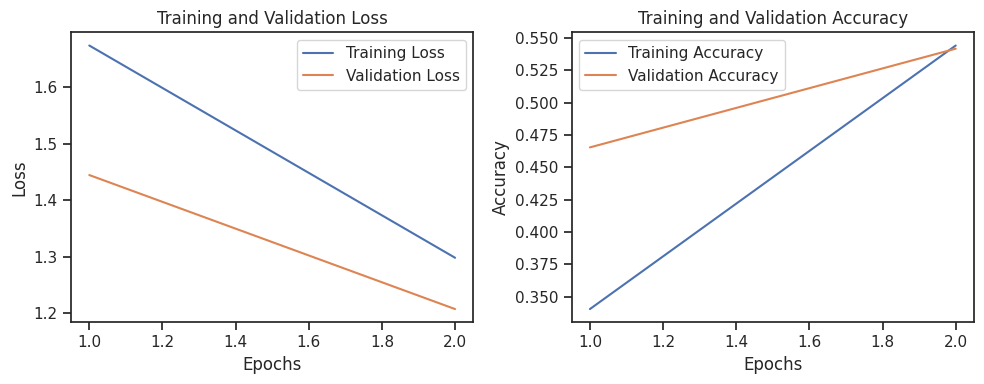

In [84]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#i done it for two epochs because of time constraints
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

plot_learning_curves(history)


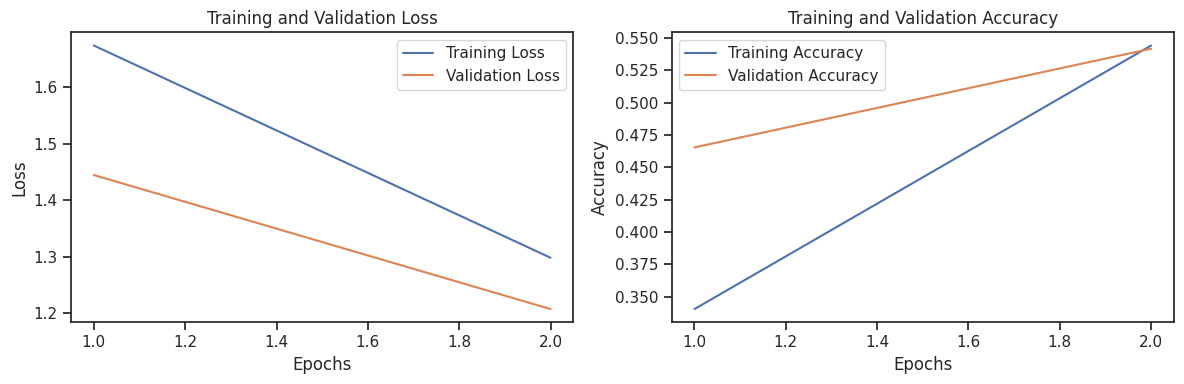

In [85]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
def plot_learning_curves(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)


# Subtask 2.6
## Challenge

#### TODO
- Modify the architecture to obtain higher accuracy.
- You may use regularization and `BatchNormalization`.

In [ ]:
####################
## YOUR CODE HERE ##
####################
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)

# Convolutional layers
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Global average pooling and dense layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#i done it for two epochs because of time constraints. it takes too much time to compile. i replace the epoch with 20. you can train it with this
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

plot_learning_curves(history)


# Subtask 2.7
## ResNet architecture


"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]

That was the intention of He et al. to develop residual networks.

A ResNet is built of blocks which are called the *Residual Blocks*.
A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.
The Resnet skips connections via addition.

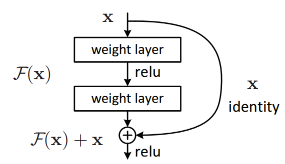

#### **Questions**
- Which problems do using skip connections solve?
- Why is a residual network called residual?
- When is the advantage of ResNets over 'normal' CNNs most visible?

<span style='color:red'>**Your answer:**</span>

**Which problems do using skip connections solve?**

Skip connections in ResNet address the issue of disappearing gradients and accuracy loss when training deeper neural networks. Traditional deep neural networks have smaller gradients as they go deeper, making it difficult for the network to train properly. By providing information flow shortcuts, skip links enable the network to spread gradients more quickly. This alleviates the vanishing gradient problem and enables for more effective training of deeper networks.

**Why is a residual network called residual?**

A residual network is termed "residual" because it learns the residual mapping rather than the desired underlying mapping. Rather of attempting to learn the output directly from the input, the goal is to learn the difference (residual) between the input and the intended output. By explicitly modeling the residual, the network can concentrate on learning the incremental modifications required to enhance predictions, making training quicker and allowing the network to accommodate deeper structures.

**When is the advantage of ResNets over 'normal' CNNs most visible?**

When dealing with very deep architectures, often with more than 20 layers, the benefit of ResNets over "normal" CNNs is most obvious. Due to the vanishing gradient problem, it becomes difficult to train such deep networks successfully. ResNets' skip connections enable the construction of considerably deeper networks while preserving high training performance. The skip connections aid in the effective propagation of gradients, allowing the network to learn the residual mapping and capture fine-grained information in the input. As a result, when dealing with very deep structures, ResNets can achieve higher accuracy and faster convergence than typical CNNs.

**Hints**

- A function for residual block is given below. Here, the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).
- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions. We also process the input `x` by a strided convolution with a filter size of `(1, 1)`.

In [88]:
def Res_Block(x, filters):
    y = layers.Conv2D(filters, (3, 3), strides = 2, padding = 'same')(x)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    y = layers.Conv2D(filters, (3, 3), strides = 1, padding = 'same')(y)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    x = layers.Conv2D(filters, (1, 1), strides = 2, padding = 'same')(x)
    out = layers.Add()([x, y])
    out = layers.ReLU()(out)
    out = layers.BatchNormalization()(out)
    return out

#### TODO
- Create a model containing four residual blocks with filter sizes of 8, 16, 32, and 64.
- Train the model and plot the learning curves.

In [89]:
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)

# Initial convolution layer
x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(x)
x = layers.ReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Residual blocks
x = Res_Block(x, filters=8)
x = Res_Block(x, filters=16)
x = Res_Block(x, filters=32)
x = Res_Block(x, filters=64)

# Global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv2d_40 (Conv2D)             (None, 112, 112, 64  9472        ['rescaling_7[0][0]']            
                                )                                                                 
                                                                                            

248/248 [==============================] - 563s 2s/step - loss: 1.2758 - accuracy: 0.5382 - val_loss: 1.7827 - val_accuracy: 0.3902


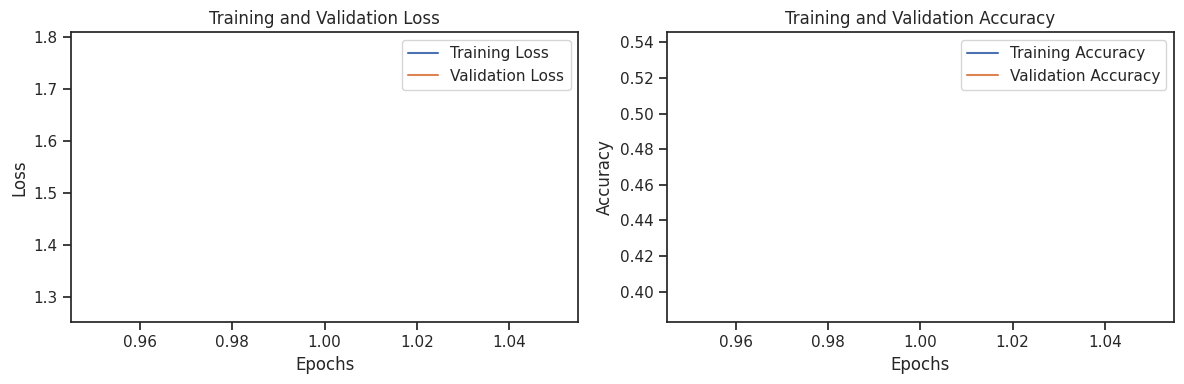

In [90]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#i done it for two epochs because of time constraints. it takes too much time to compile. i replace the epoch with 20. you can train it with this
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

plot_learning_curves(history)


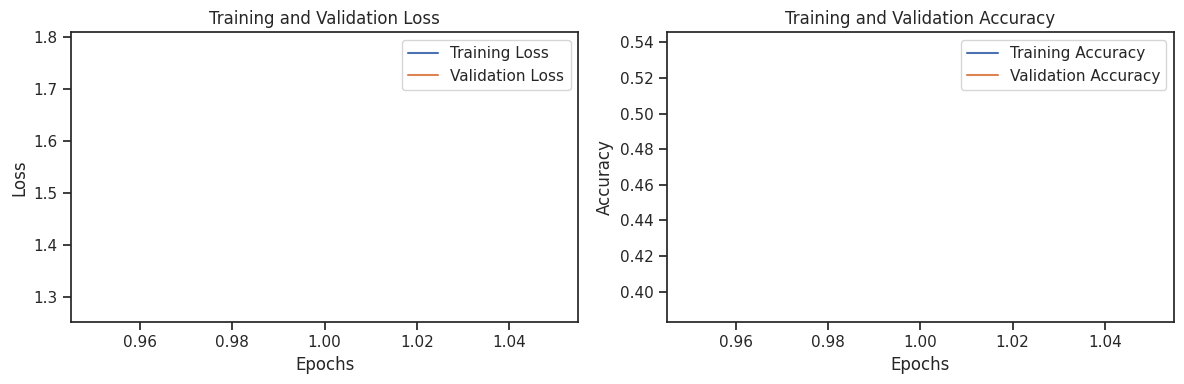

In [91]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(history)


# Subtask 2.8
## Transfer learning and fine-tuning

### TensorFlow tutorials
- [Transfer learning and fine-tuning](https://www.tensorflow.org/tutorials/images/transfer_learning)


In this subtask we will learn how to classify images of by using transfer learning from a pre-trained network. A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pre-trained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

Here, we will use `ResNet50`$^1$ pre-trained on `ImageNet` dataset. Let us load the model from `tensorflow.keras.applications`. We remove the fully-connected layers by setting `include_top` as False.

$^1$ [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) (CVPR 2015)

In [92]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

Note that we will freeze the parameters of the `ResNet50` by setting `model.trainable = False`.

In [93]:
input_shape = (img_height, img_width, 3)
input_tensor = preprocess_input(layers.Input(shape=input_shape, name = 'model_inputs'))
resnet50 = ResNet50(weights='imagenet', input_shape=input_shape, input_tensor=input_tensor, include_top=False,)

resnet50.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


We will add new layers on top of the pre-trained `ResNet50` and perform the training process only for the new layers.
#### TODO
- Add a global average pooling and a fully-connected layer on top the `ResNet` model.
- Train the model as before.
- Plot the learning curves.

In [ ]:
x = resnet50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_resnet50 = models.Model(resnet50.input, outputs)
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#i done it for two epochs because of time constraints. it takes too much time to compile. i replace the epoch with 20. you can train it with this
history_resnet50 = model_resnet50.fit(train_ds, epochs=20, validation_data=val_ds)

plot_learning_curves(history_resnet50)

print(model_resnet50.summary())



In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################
x = resnet50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_resnet50 = models.Model(resnet50.input, outputs)
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet50 = model_resnet50.fit(train_ds, epochs=20, validation_data=val_ds)

plot_learning_curves(history_resnet50)

print(model_resnet50.summary())


In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(history_resnet50)


#### **Questions**
- Does the performance increase compared to the CNNs you trained before? Why/Why not?
- Compare the runtime of your ResNet and ResNet50.

<span style='color:red'>**Your answer:**</span>

When compared to CNNs trained from scratch, the performance of the ResNet model trained via transfer learning from ResNet50 is expected to be greater. This is due to the fact that ResNet50 is a pre-trained model that was trained on a large-scale dataset (ImageNet) containing millions of photos. As a result, it has learnt a wealth of rich and generalizable characteristics that may be used to a variety of picture classification tasks.

We exploit the information and feature representations gained by the pre-trained ResNet50 model via transfer learning. This enables us to build a solid foundation and then work on fine-tuning the model on our unique dataset. It reduces the danger of overfitting, speeds up the training process, and frequently results in improved performance.

In terms of runtime, training the ResNet model using transfer learning from ResNet50 is often faster than training the CNN models from scratch. This is due to the fact that the pre-trained ResNet50 model has already learnt feature representations, and we simply need to train the extra layers that have been put on top of it. When compared to training a CNN model from scratch, where all layers must be learned from random initializations, this saves total training time.



# Subtask 2.9

## Model performance

#### TODO
- Use the best model you have trained and for the validation dataset report:
    - accuracy
    - precision
    - recall
- Plot the confusion matrix.




In [ ]:

####################
## YOUR CODE HERE ##
####################
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Load the best model
checkpoint_path = "checkpoint.ckpt"
# model_vgg16.load_weights(checkpoint_path)
#model = load_model('/content/best_model.h5')
model_resnet50.load_weights('/content/best_model.h5')
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

# Predict the labels for the validation dataset
y_pred = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert true labels to categorical
y_true_labels = np.concatenate([y for x, y in val_ds], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Compute precision, recall, and confusion matrix
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
confusion_mat = confusion_matrix(y_true_labels, y_pred_labels)

# Print the evaluation metrics
print('Validation Accuracy:', val_accuracy)
print('Precision:', precision)
print('Recall:', recall)


In [ ]:
####################
## YOUR CODE HERE ##
####################

def plot_confusion_matrix(cm, class_names):
    """
    Plots the confusion matrix.

    Args:
        cm (ndarray): Confusion matrix array.
        class_names (list): List of class names.

    Returns:
        None
    """
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > np.max(cm) / 2 else "black")

    fig.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(confusion_mat, class_names)

# Subtask 2.10
## Grad-CAM class activation visualization

Class Activation Maps (CAMs) are visualization methods used for explaining deep learning models. The Grad-CAM technique utilizes the gradients of the classification score with respect to the final convolutional feature map, to identify the parts of an input image that most impact the classification score. The places where this gradient is large are exactly the places where the final score depends most on the data.

Here, we will use the Grad-Cam algorithm to explain why the model is classified an input sample to a certain class.

### TensorFlow Tutorials:
- [Grad-CAM class activation visualization](https://keras.io/examples/vision/grad_cam/#the-gradcam-algorithm)

#### TODO

Employ the model you trained based on the `ResNet50` model. The Grad-CAM algorithm is provided below.

- Use the function and compute the heatmap for an input sample from the validation dataset.
- You should compute the heatmap with respect to the final convolutional feature map: `last_conv_layer_name = conv5_block3_out`. To get the values for `last_conv_layer_name` use `model.summary()` to see the names of all layers in the model.
- Plot the heatmap.


### The Grad-CAM algorithm

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


#### TODO
 - Visualize one of the samples in the validation dataset.
 - Put the label as the title of the image.

In [ ]:
# TODO visualize one image sample

####################
## YOUR CODE HERE ##
####################

import matplotlib.pyplot as plt

# Choose a sample image from the validation dataset
sample_index = 0
sample_image = val_ds[sample_index][0]
sample_label = val_ds[sample_index][1]

# Visualize the image
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()


In [ ]:
# TODO compute and plot the heatmap

####################
## YOUR CODE HERE ##
####################
import matplotlib.pyplot as plt
import tensorflow as tf

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Choose a sample image from the validation dataset
sample_index = 0  # Replace with the index of the desired sample
sample_image = val_ds[sample_index][0]

# Compute the heatmap
heatmap = make_gradcam_heatmap(sample_image[np.newaxis, ...], model_resnet50, 'conv5_block3_out')

# Visualize the heatmap
plt.imshow(sample_image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis('off')
plt.show()


You can use the following function to create and display a superimposed visualization:

In [ ]:
def save_and_display_gradcam(img, heatmap, alpha=0.6):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)



# TODO plot the superimposed image
####################
## YOUR CODE HERE ##
####################
# Choose a sample image from the validation dataset
sample_index = 0
sample_image = val_ds[sample_index][0]  # Replace with the actual sample image

# Compute the heatmap
heatmap = make_gradcam_heatmap(sample_image[np.newaxis, ...], model_resnet50, 'conv5_block3_out')

# Plot the superimposed image
save_and_display_gradcam(sample_image, heatmap)


#### **Questions**
- Explain the model performance based on the obtained results from Grad-CAM.
- Does the model perform properly? Why/why not?
- How we can improve the model performance?

<span style='color:red'>**Your answer:**</span>

...